In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df_desmatamento = pd.read_csv('desmatamento_ucs.csv', encoding='latin1', sep=";")
df_especies = pd.read_csv('pda-especies_ameacadas.csv', encoding='latin1', sep=";")


In [129]:
#tratamento dos dados
## limpeza dos dados
df_especies = df_especies[['Nome Científico', 'Nome Comum', 'Categoria', 'Estado', 'Região', 'Unidade de Conservação Federal']]

df_especies_sem_null = df_especies.dropna(subset='Nome Científico') #limpeza dos dados nulos

#tratamento das categorias repetidas / agrupamento
mascara_vulneravel = df_especies_sem_null['Categoria'] == 'Vulnerável (VU)'
df_especies_sem_null.loc[mascara_vulneravel, 'Categoria'] = 'Vulnerável'

mascara_em_perigo = df_especies_sem_null['Categoria'] == 'Em Perigo (EN)'
df_especies_sem_null.loc[mascara_em_perigo, 'Categoria'] = 'Em Perigo'

mascara_criticamente_em_perigo = df_especies_sem_null['Categoria'] == 'Criticamente em Perigo (CR)'
df_especies_sem_null.loc[mascara_criticamente_em_perigo, 'Categoria'] = 'Criticamente em Perigo'

mascara_extinta= (df_especies_sem_null['Categoria'] == 'Regionalmente Extinta') | (df_especies_sem_null['Categoria'] == 'Extinta na Natureza')
df_especies_sem_null.loc[mascara_extinta, 'Categoria'] = 'Extinta'

df_especies_tratado = df_especies_sem_null

df_especies_tratado

C:\Users\Vagner\AppData\Local\Temp\ipykernel_21492\4005190552.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_sem_null.loc[mascara_vulneravel, 'Categoria'] = 'Vulnerável'
C:\Users\Vagner\AppData\Local\Temp\ipykernel_21492\4005190552.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_sem_null.loc[mascara_em_perigo, 'Categoria'] = 'Em Perigo'
C:\Users\Vagner\AppData\Local\Temp\ipykernel_21492\4005190552.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Nome Científico,Nome Comum,Categoria,Estado,Região,Unidade de Conservação Federal
0,Apareiodon davisi,Peixe-rei,Em Perigo,"Ceará, Paraíba, Pernambuco, Rio Grande do Norte",Nordeste,NaN
1,Myloplus tiete,Pacu-prata,Em Perigo,"Goiás, Mato Grosso do Sul, Minas Gerais, Paran...","Centro-Oeste, Sudeste, Sul",NaN
2,Brycon devillei,Piabinha,Em Perigo,"Bahia, Minas Gerais","Nordeste, Sudeste",NaN
3,Bryconamericus lambari,Lambari,Em Perigo,Rio Grande do Sul,Sul,NaN
4,Diapoma pyrrhopteryx,Lambari,Em Perigo,"Rio Grande do Sul, Santa Catarina",Sul,NaN
...,...,...,...,...,...,...
1251,Sluysia triapertura,NaN,Criticamente em Perigo,Rio Grande do Norte,Nordeste,NaN
1252,Girardia arenicola,Planária,Criticamente em Perigo,São Paulo,Sudeste,NaN
1253,Girardia paucipuntacta,Planária,Criticamente em Perigo,São Paulo,Sudeste,NaN
1254,Bouchardia rosea,braquiópode,Em Perigo,NaN,NaN,NaN


'\ninsights:\né possível observar que a população de espécies com um grau de risco de extinção mais elevado são menos numerosas\nque as espécies com um grau de risco de extinção menos elevado.\n\n'

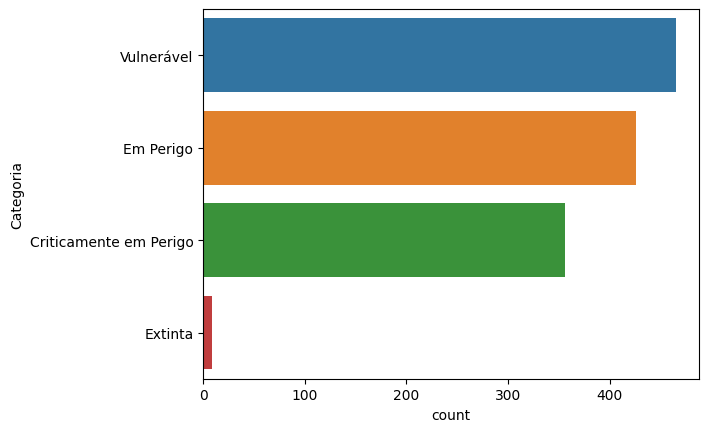

In [4]:
#qual a quantidade de espécies por categoria de extinção?
sns.countplot(df_especies_tratado, y="Categoria", order = df_especies_tratado["Categoria"].value_counts().index.tolist())

'''
insights:
é possível observar que a população de espécies com um grau de risco de extinção mais elevado são menos numerosas
que as espécies com um grau de risco de extinção menos elevado.

'''

['Vulnerável', 'Em Perigo', 'Criticamente em Perigo', 'Extinta']


C:\Users\Vagner\AppData\Local\Temp\ipykernel_21492\3437092406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_especies_com_coluna_ucf['Localizada em UCF'] = mascara_com_uc


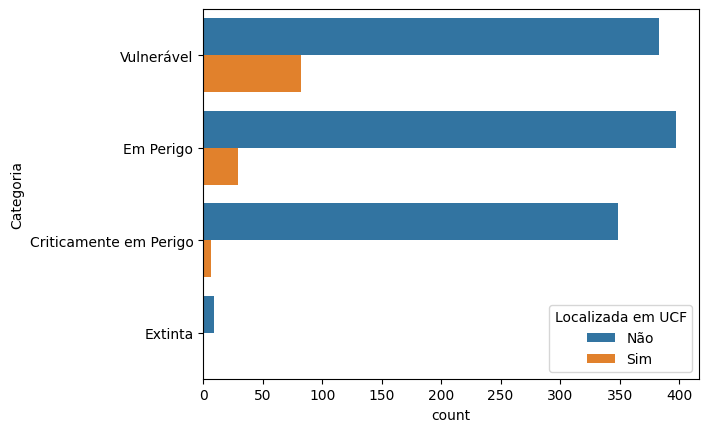

In [108]:
#qual a quantidade de espécies por categoria de extinção em unidades de conservação?
mascara_sem_uc = df_especies_tratado['Unidade de Conservação Federal'].isnull()
mascara_com_uc = (~mascara_sem_uc)

df_especies_com_coluna_ucf = df_especies_tratado
df_especies_com_coluna_ucf['Localizada em UCF'] = mascara_com_uc
df_especies_tratado.loc[mascara_com_uc, 'Localizada em UCF'] = 'Sim'
df_especies_tratado.loc[mascara_sem_uc, 'Localizada em UCF'] = 'Não'

df_especies_com_coluna_ucf['Localizada em UCF'].value_counts()

sns.countplot(df_especies_com_coluna_ucf, y="Categoria", hue='Localizada em UCF', order = df_especies_com_coluna_ucf["Categoria"].value_counts().index.tolist())

''' 
insights:

É possível observar não existe nenhuma espécie extinta que estava protegida em uma unidade de conservação federal
Além disso, é possivel notar que as espécies com um grau de risco de extinção mais elevado estão em menor quantidade nas unidades de conservação, se comparadas
as espécies que não estão protegidas por uma unidade de conservação
'''

<Axes: xlabel='Quantidade de Espécies', ylabel='Estado'>

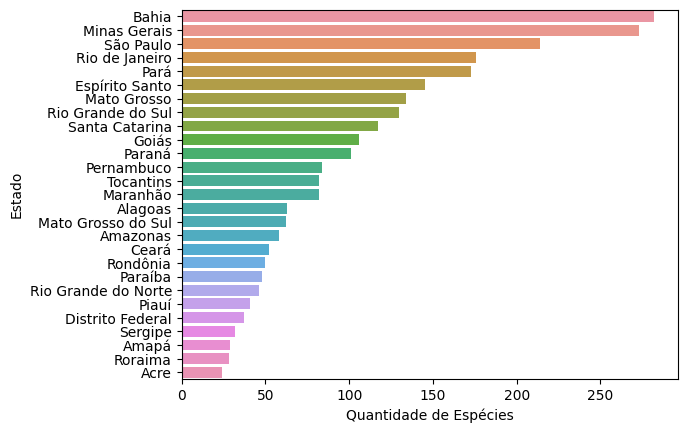

In [130]:
# qual a quantidade de espécies por estado?


categoria_por_estado = []

estados = ["Acre", "Alagoas", "Amapá", "Amazonas", "Bahia", "Ceará",
    "Distrito Federal", "Espírito Santo", "Goiás", "Maranhão",
    "Mato Grosso", "Mato Grosso do Sul", "Minas Gerais",
    "Pará", "Paraíba", "Paraná", "Pernambuco", "Piauí", "Rio de Janeiro",
    "Rio Grande do Norte", "Rio Grande do Sul", "Rondônia", "Roraima",
    "Santa Catarina", "São Paulo", "Sergipe", "Tocantins"]

for i in estados:
    vulneravel_por_estado = 0
    perigo_por_estado = 0
    criticamente_em_perigo_por_estado = 0
    extinta_por_estado = 0

    index_linha = -1
    for j in df_especies_tratado['Estado'].astype(str):
        index_linha = index_linha + 1
        if j.count(i) == 0:
            continue     
           
        if df_especies_tratado['Categoria'][index_linha] == 'Vulnerável':
            vulneravel_por_estado = vulneravel_por_estado + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Em Perigo':
            perigo_por_estado = perigo_por_estado + 1           
        elif df_especies_tratado['Categoria'][index_linha] == 'Criticamente em Perigo':
            criticamente_em_perigo_por_estado = criticamente_em_perigo_por_estado + 1
        elif df_especies_tratado['Categoria'][index_linha] == 'Extinta':
            extinta_por_estado = extinta_por_estado + 1
    quantidade_total = vulneravel_por_estado + perigo_por_estado + criticamente_em_perigo_por_estado + extinta_por_estado
    categoria_por_estado.append([i, quantidade_total, vulneravel_por_estado, perigo_por_estado, criticamente_em_perigo_por_estado, extinta_por_estado])

df_estados = pd.DataFrame(categoria_por_estado, columns=['Estado', 'Quantidade de Espécies', 'Vulnerável', 'Em Perigo', 'Criticamente em Perigo', 'Extinta'])
df_estados

df_estados = df_estados.sort_values(by='Quantidade de Espécies', ascending=False)
sns.barplot(df_estados, x="Quantidade de Espécies", y="Estado", errorbar=None)

'''
Insights:
é possível observar que Bahia, Minas Gerais e São Paulo são os estados com maior número de espécies em risco,
enquanto Acre, Roraima e Amapá são os estados com o menor número

'''



In [131]:
df_estados

,Estado,Quantidade de Espécies,Vulnerável,Em Perigo,Criticamente em Perigo,Extinta
4,Bahia,282,104,129,49,0
12,Minas Gerais,273,107,102,64,0
24,São Paulo,214,89,62,60,3
18,Rio de Janeiro,176,71,52,53,0
13,Pará,173,111,35,27,0
7,Espírito Santo,145,68,54,23,0
10,Mato Grosso,134,87,35,10,2
20,Rio Grande do Sul,130,60,45,24,1
23,Santa Catarina,117,60,34,22,1
8,Goiás,106,55,37,14,0


<Axes: xlabel='Vulnerável', ylabel='Estado'>

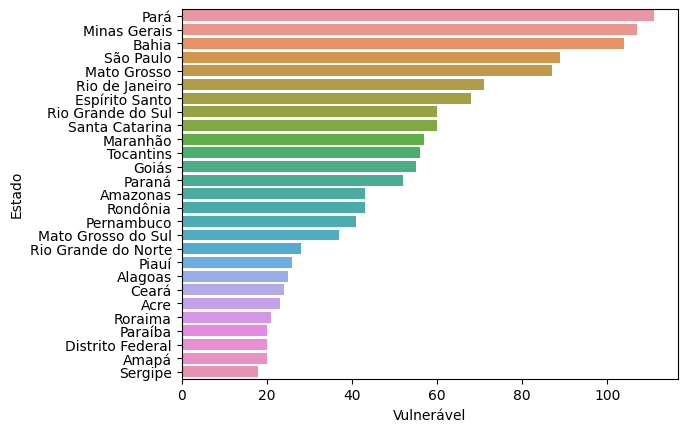

In [112]:
# qual a quantidade de espécies consideradas vulneráveis por estado?


df_estados = df_estados.sort_values(by='Vulnerável', ascending=False)
sns.barplot(df_estados, x="Vulnerável", y="Estado", errorbar=None)

'''
Insights:
é possível notar que Pará, Minas Gerais, Bahia e São Paulo são os estados com maior número de espécies consideradas vulneráveis.
Todos esses 4 estados estão no top5 dos que apresentam a maior quantidade de espécies.

enquanto Amapá, Sergipe e Distrito Federal são o que apresentam menor número
'''

<Axes: xlabel='Em Perigo', ylabel='Estado'>

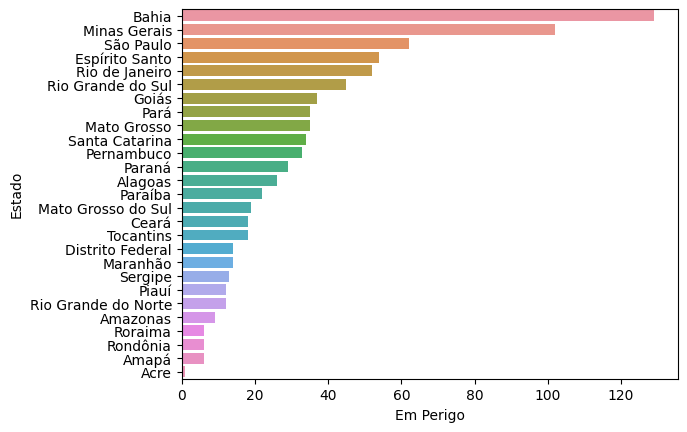

In [114]:
# qual a quantidade de espécies consideradas em perigo por estado?


df_estados = df_estados.sort_values(by='Em Perigo', ascending=False)
sns.barplot(df_estados, x="Em Perigo", y="Estado", errorbar=None)

'''
insights:
é possível observar que Bahia, Minas Gerais e São Paulo são os estados com maior número de espécies em perigo,
esses três estados também pertence ao top3 geral

Acre, Amapá e Rondônia possuem os menores índices.

'''

<Axes: xlabel='Criticamente em Perigo', ylabel='Estado'>

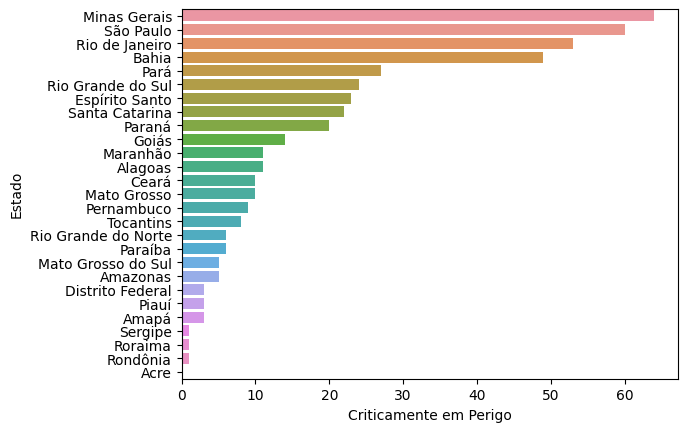

In [115]:
# qual a quantidade de espécies consideradas criticamente em perigo por estado?


df_estados = df_estados.sort_values(by='Criticamente em Perigo', ascending=False)
sns.barplot(df_estados, x="Criticamente em Perigo", y="Estado", errorbar=None)

'''
é possível observar que Minas Gerais, São Paulo e Rio de Janeiro são os estados com maior número de espécies em risco,
eles também lideram o top5 dos espécies gerais

Acre, Rondônia e Roraima são os que apresentam menos
'''

<Axes: xlabel='Extinta', ylabel='Estado'>

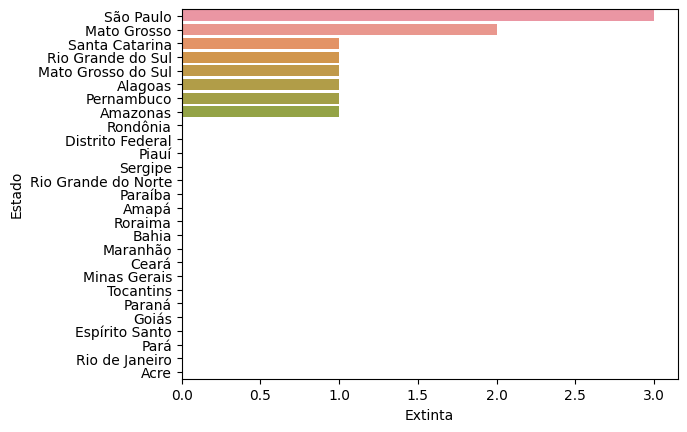

In [127]:
# qual a quantidade de espécies consideradas extintas por estado?

df_estados = df_estados.sort_values(by='Extinta', ascending=False)
sns.barplot(df_estados, x="Extinta", y="Estado", errorbar=None)

'''
Só há espécies extintas em 8 estados Brasileiros, sendo eles: ...
São Paulo, mais uma vez, lidera o ranking.
'''

0
